<a href="https://colab.research.google.com/github/navaneethkrishnap/internship-bba6/blob/main/test_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uplaoded = files.upload()

Saving web_traffic.csv to web_traffic.csv


In [ ]:
df = pd.read_csv('web_traffic.csv')

In [ ]:
df.head()

,Date,Visitors,Unique Visitors,Bounce Rate (%),Avg. Session Duration (min),Organic Traffic (%),Paid Traffic (%),Referral Traffic (%),Direct Traffic (%)
0,Jan 2023,873,324,42.15,4.87,52.34,8.12,22.18,17.36
1,Feb 2023,803,297,43.28,5.21,53.62,7.89,21.76,16.73
2,Mar 2023,1032,531,41.97,4.76,51.98,8.45,22.83,16.74
3,Apr 2023,905,109,44.32,5.12,50.76,9.13,23.45,16.66
4,May 2023,1157,223,45.18,5.34,49.87,9.68,24.12,16.33


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format='%b %Y')

In [ ]:
df.head()

,Date,Visitors,Unique Visitors,Bounce Rate (%),Avg. Session Duration (min),Organic Traffic (%),Paid Traffic (%),Referral Traffic (%),Direct Traffic (%)
0,2023-01-01,873,324,42.15,4.87,52.34,8.12,22.18,17.36
1,2023-02-01,803,297,43.28,5.21,53.62,7.89,21.76,16.73
2,2023-03-01,1032,531,41.97,4.76,51.98,8.45,22.83,16.74
3,2023-04-01,905,109,44.32,5.12,50.76,9.13,23.45,16.66
4,2023-05-01,1157,223,45.18,5.34,49.87,9.68,24.12,16.33


In [ ]:
df['Quarter'] = df['Date'].dt.to_period('Q')

In [ ]:
df.head(2)

,Date,Visitors,Unique Visitors,Bounce Rate (%),Avg. Session Duration (min),Organic Traffic (%),Paid Traffic (%),Referral Traffic (%),Direct Traffic (%),Quarter
0,2023-01-01,873,324,42.15,4.87,52.34,8.12,22.18,17.36,2023Q1
1,2023-02-01,803,297,43.28,5.21,53.62,7.89,21.76,16.73,2023Q1


In [ ]:
quarter = df.groupby('Quarter').mean(numeric_only=True).reset_index()
quarter.head(2)

,Quarter,Visitors,Unique Visitors,Bounce Rate (%),Avg. Session Duration (min),Organic Traffic (%),Paid Traffic (%),Referral Traffic (%),Direct Traffic (%)
0,2023Q1,902.666667,384.000000,42.466667,4.946667,52.646667,8.153333,22.256667,16.943333
1,2023Q2,1023.000000,209.666667,45.246667,5.340000,49.853333,9.683333,24.083333,16.380000


In [ ]:
quarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype        
---  ------                       --------------  -----        
 0   Quarter                      8 non-null      period[Q-DEC]
 1   Visitors                     8 non-null      float64      
 2   Unique Visitors              8 non-null      float64      
 3   Bounce Rate (%)              8 non-null      float64      
 4   Avg. Session Duration (min)  8 non-null      float64      
 5   Organic Traffic (%)          8 non-null      float64      
 6   Paid Traffic (%)             8 non-null      float64      
 7   Referral Traffic (%)         8 non-null      float64      
 8   Direct Traffic (%)           8 non-null      float64      
dtypes: float64(8), period[Q-DEC](1)
memory usage: 708.0 bytes


In [ ]:
quarter.describe()

,Visitors,Unique Visitors,Bounce Rate (%),Avg. Session Duration (min),Organic Traffic (%),Paid Traffic (%),Referral Traffic (%),Direct Traffic (%)
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1495.208333,371.541667,44.617917,5.118333,51.589583,9.142083,23.102917,16.165417
std,459.168743,107.902357,0.928716,0.117189,1.226151,0.685067,0.730085,0.402508
min,902.666667,209.666667,42.466667,4.946667,49.853333,8.153333,22.256667,15.626667
25%,1111.000000,311.500000,44.621667,5.047500,50.590000,8.591667,22.468333,16.025000
50%,1510.500000,376.333333,44.870000,5.118333,51.823333,9.226667,23.031667,16.161667
75%,1786.166667,423.000000,45.226667,5.168333,52.688333,9.717500,23.720000,16.242500
max,2173.333333,551.333333,45.250000,5.340000,52.816667,9.880000,24.083333,16.943333


In [ ]:
quarter["Quarter"] = quarter["Quarter"].astype(str)

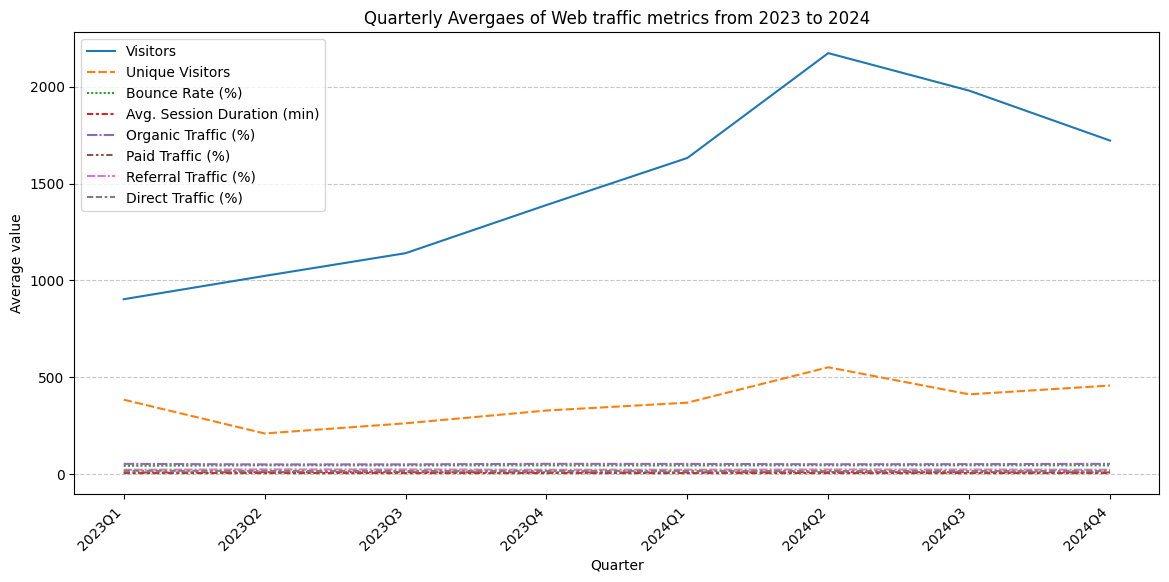

In [ ]:
# plots
plt.figure(figsize=(14,6))
sns.lineplot(data=quarter.set_index('Quarter'))
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average value')
plt.title('Quarterly Avergaes of Web traffic metrics from 2023 to 2024')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

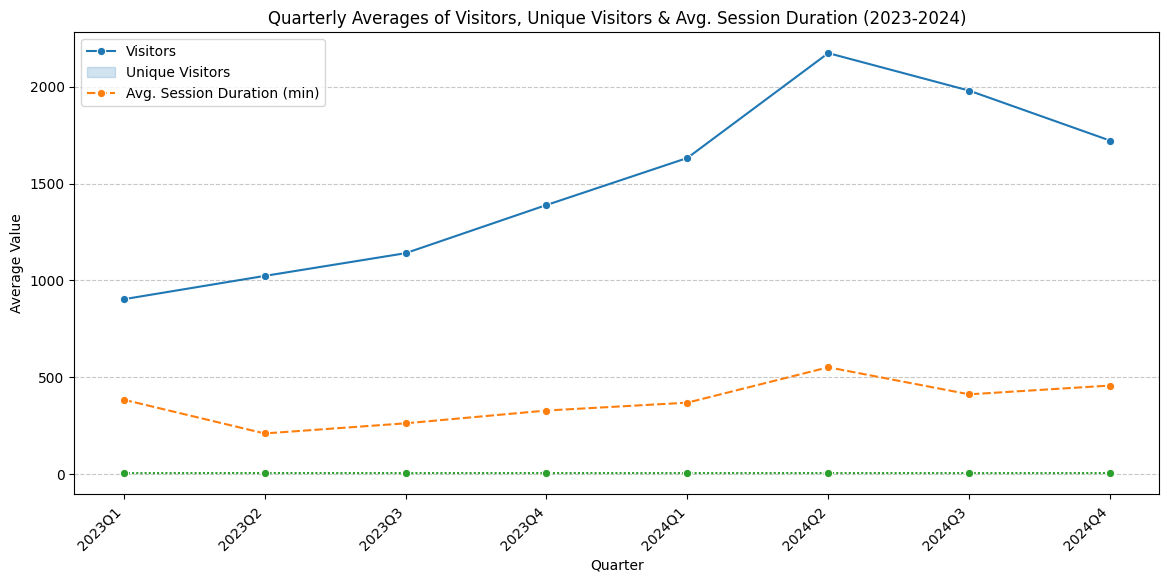

In [ ]:
# Line plot for Visitors, Unique Visitors, and Avg. Session Duration over Quarters
plt.figure(figsize=(14, 6))
sns.lineplot(data=quarter.set_index("Quarter")[["Visitors", "Unique Visitors", "Avg. Session Duration (min)"]], marker="o")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Value")
plt.title("Quarterly Averages of Visitors, Unique Visitors & Avg. Session Duration (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(["Visitors", "Unique Visitors", "Avg. Session Duration (min)"])
plt.show()


In [ ]:
quarter.columns

Index(['Quarter', 'Visitors', 'Unique Visitors', 'Bounce Rate (%)',
       'Avg. Session Duration (min)', 'Organic Traffic (%)',
       'Paid Traffic (%)', 'Referral Traffic (%)', 'Direct Traffic (%)'],
      dtype='object')

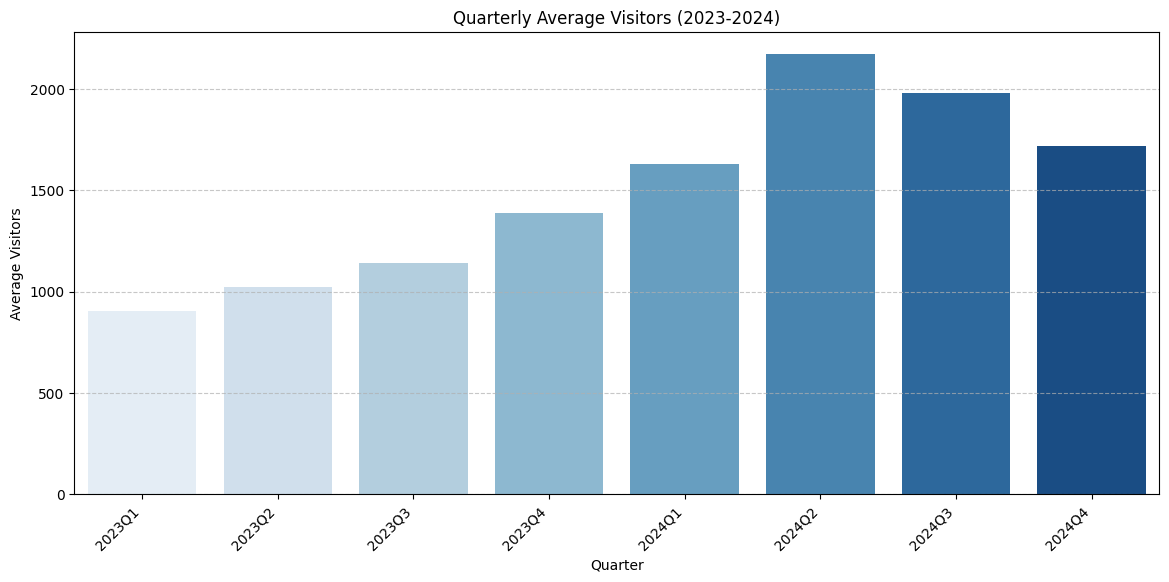

In [ ]:
# Visitors
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Visitors", hue="Quarter", data=quarter, palette="Blues", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Visitors")
plt.title("Quarterly Average Visitors (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



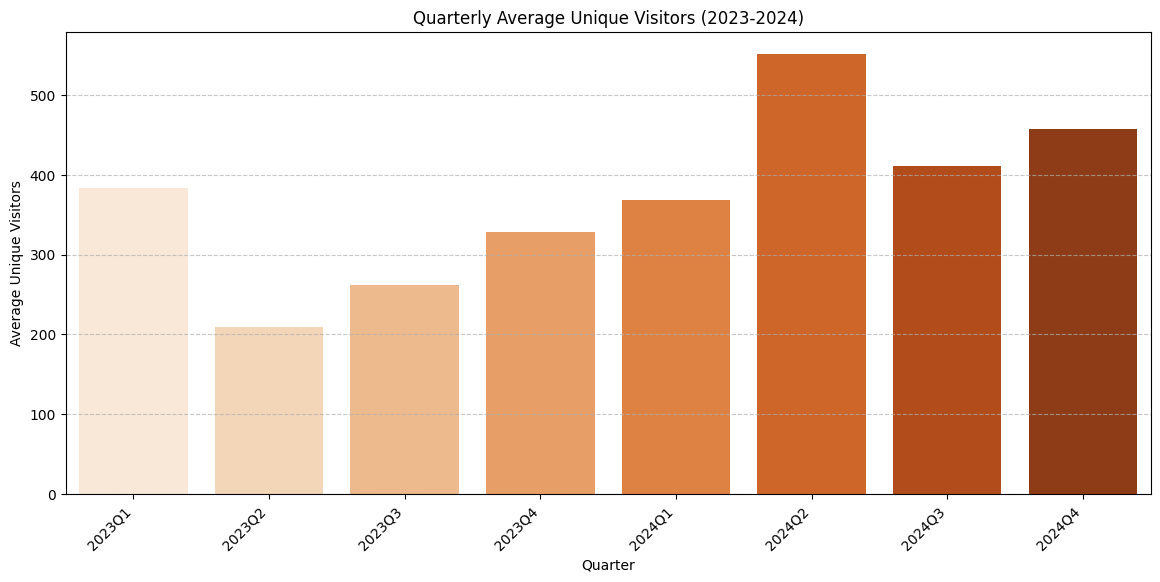

In [ ]:
# Unique Visitors
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Unique Visitors", hue="Quarter", data=quarter, palette="Oranges", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Unique Visitors")
plt.title("Quarterly Average Unique Visitors (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


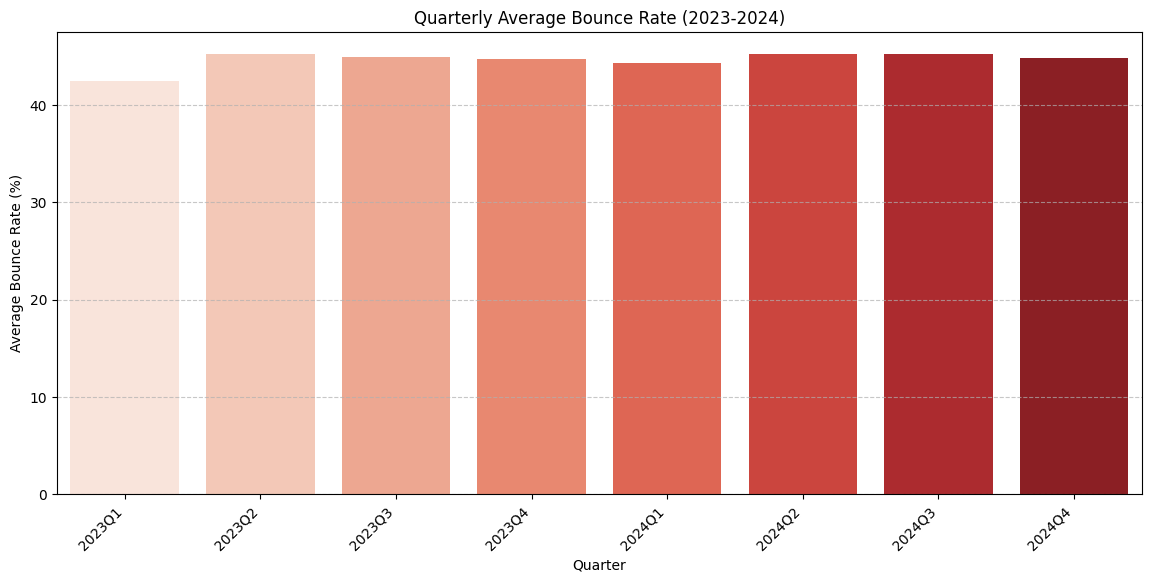

In [ ]:

# Bounce Rate
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Bounce Rate (%)", hue="Quarter", data=quarter, palette="Reds", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Bounce Rate (%)")
plt.title("Quarterly Average Bounce Rate (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


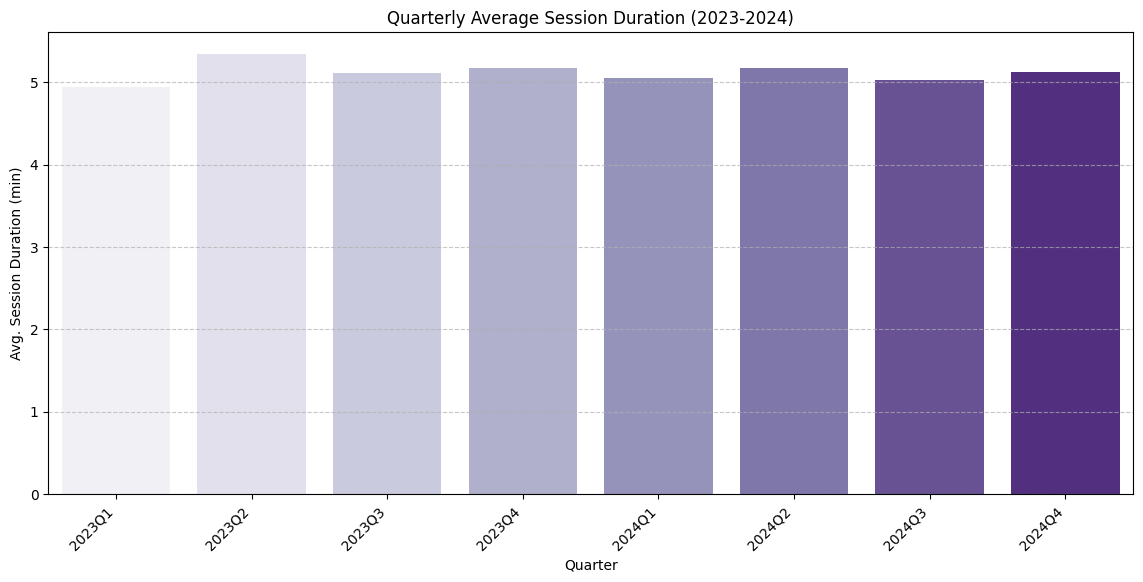

In [ ]:

# Average Session Duration
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Avg. Session Duration (min)", hue="Quarter", data=quarter, palette="Purples", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Avg. Session Duration (min)")
plt.title("Quarterly Average Session Duration (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



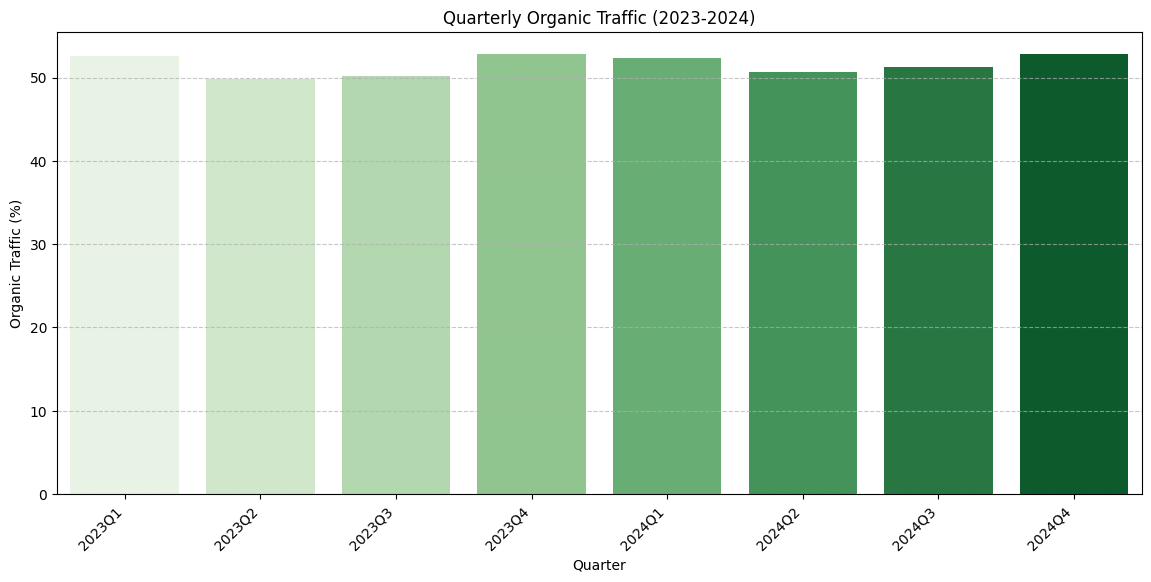

In [ ]:
# Organic Traffic
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Organic Traffic (%)", hue="Quarter", data=quarter, palette="Greens", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Organic Traffic (%)")
plt.title("Quarterly Organic Traffic (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



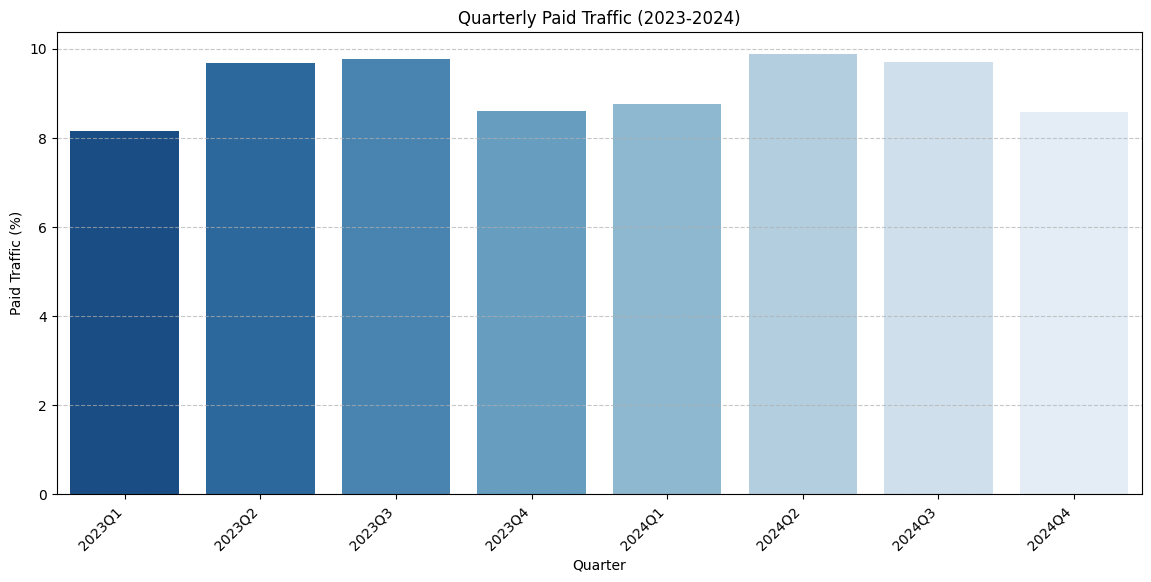

In [ ]:
# Paid Traffic
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Paid Traffic (%)", hue="Quarter", data=quarter, palette="Blues_r", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Paid Traffic (%)")
plt.title("Quarterly Paid Traffic (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



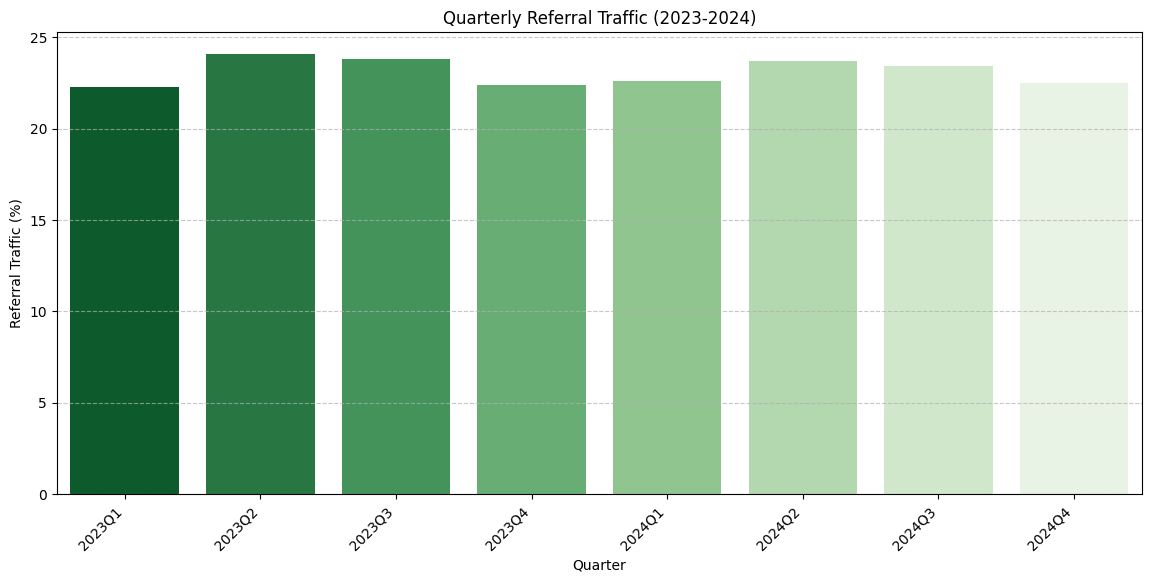

In [ ]:
# Referral Traffic
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Referral Traffic (%)", hue="Quarter", data=quarter, palette="Greens_r", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Referral Traffic (%)")
plt.title("Quarterly Referral Traffic (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


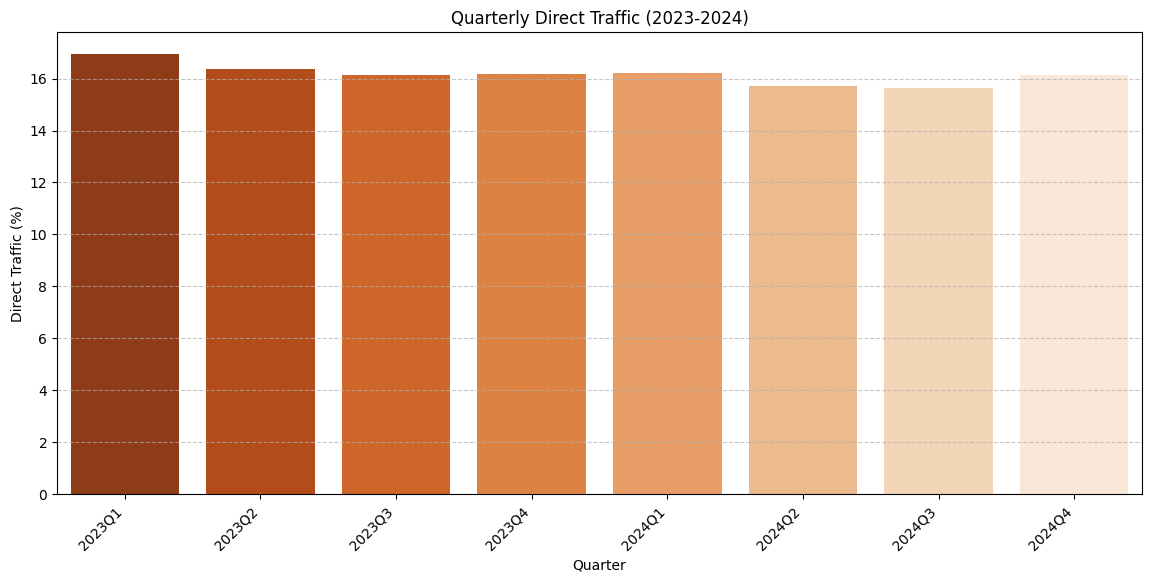

In [ ]:

# Direct Traffic
plt.figure(figsize=(14, 6))
sns.barplot(x="Quarter", y="Direct Traffic (%)", hue="Quarter", data=quarter, palette="Oranges_r", legend=False)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Direct Traffic (%)")
plt.title("Quarterly Direct Traffic (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


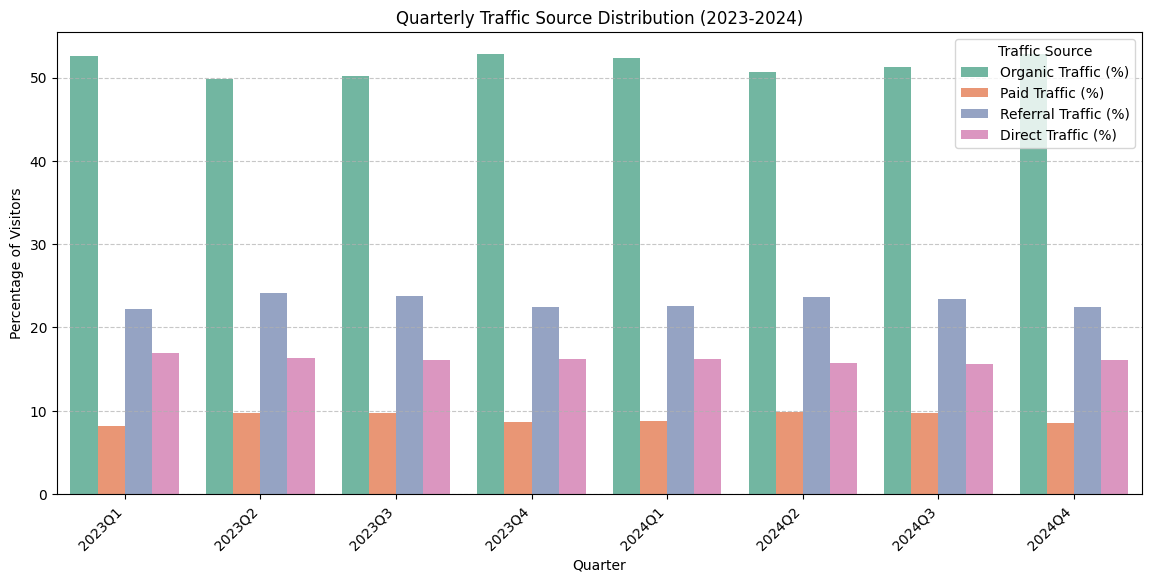

In [ ]:
# Traffic Source Distribution Across Quarters
plt.figure(figsize=(14, 6))
traffic_sources = ["Organic Traffic (%)", "Paid Traffic (%)", "Referral Traffic (%)", "Direct Traffic (%)"]
quarter_traffic_melted = quarter.melt(id_vars=["Quarter"], value_vars=traffic_sources, var_name="Traffic Source", value_name="Percentage")

sns.barplot(x="Quarter", y="Percentage", hue="Traffic Source", data=quarter_traffic_melted, palette="Set2")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of Visitors")
plt.title("Quarterly Traffic Source Distribution (2023-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Traffic Source")
plt.show()
